1. Introduction
This notebook aims to build a predictive model for loan default risk using the provided dataset. By following an end-to-end data science workflow, we'll ensure the dataset is ready for modeling.

2. Data Loading


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Set display options
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv(r'C:\Users\Annuj\Downloads\archive (11)\Applicant-details.csv')

# Display the first few rows
print("First five rows of the dataset:")
df.head()


First five rows of the dataset:


,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


3. Exploratory Data Analysis (EDA)



3.1 Basic Information


In [32]:
# Basic information about the dataset
print("\nDataset Information:")
df.info()

# Statistical summary of numerical columns
print("\nStatistical Summary:")
df.describe()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


3.2 Missing Values and Duplicates


In [33]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate entries
print("\nNumber of Duplicate Entries:")
print(df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()



Missing Values in Each Column:
Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownership(car)         0
Occupation                     0
Residence_City                 0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64

Number of Duplicate Entries:
0


3.3 Univariate Analysis
Numerical Features



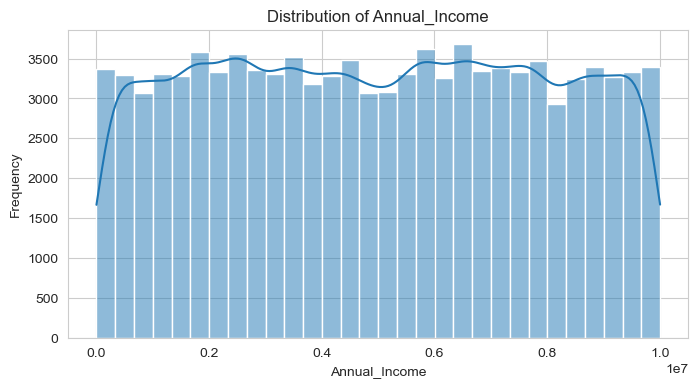

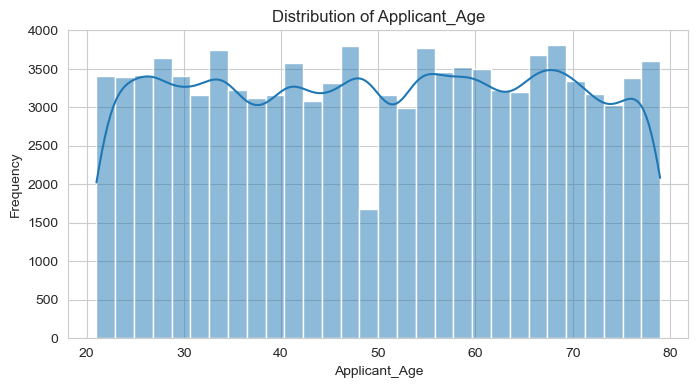

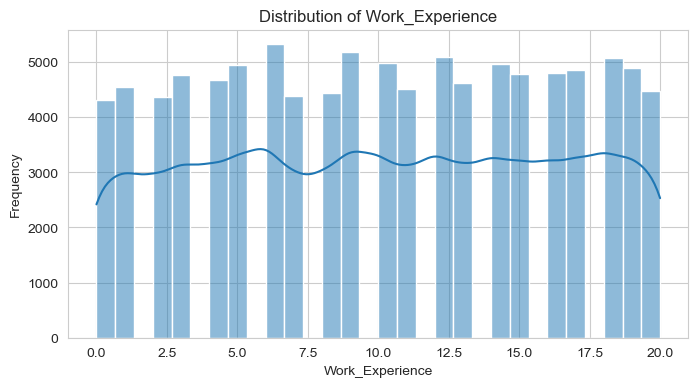

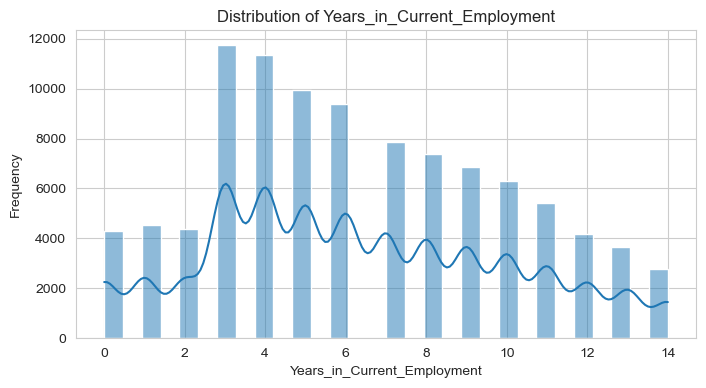

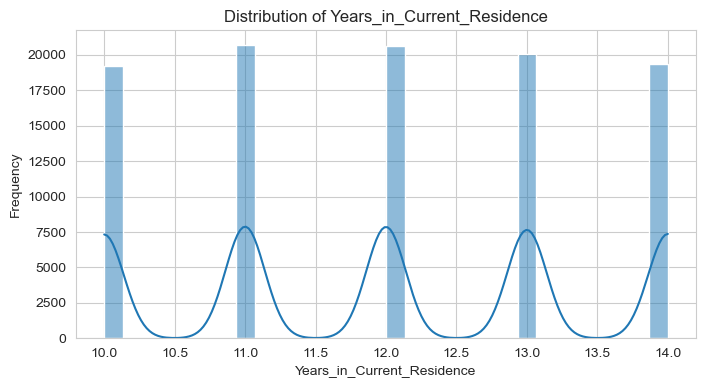

In [34]:
# List of numerical features
numerical_features = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 
                      'Years_in_Current_Employment', 'Years_in_Current_Residence']

# Histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


Categorical Features


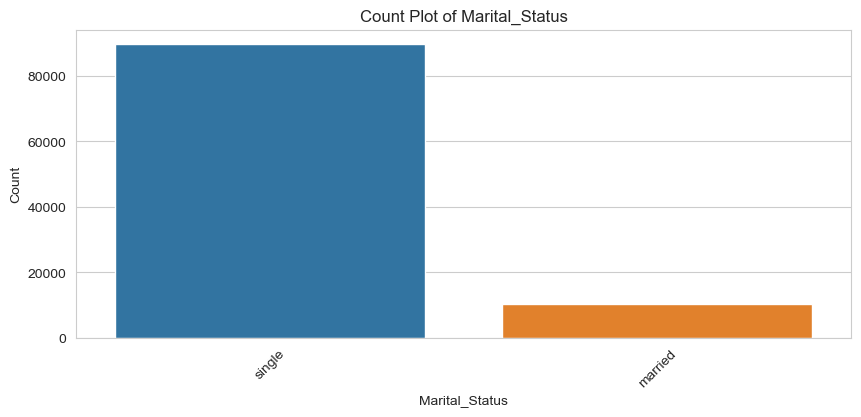

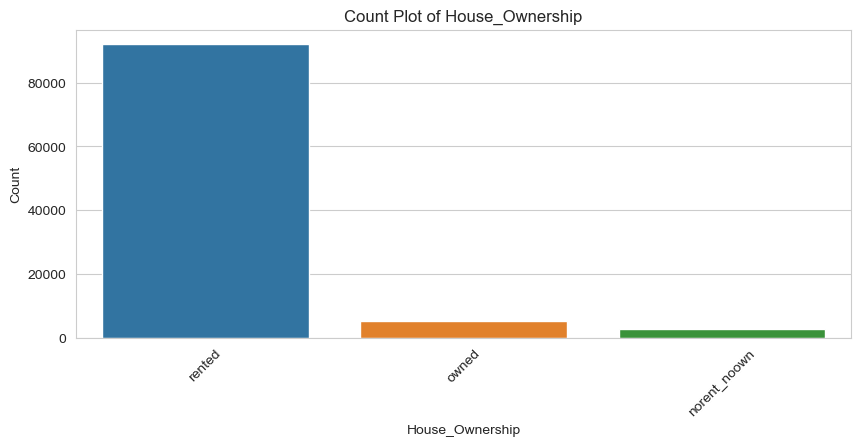

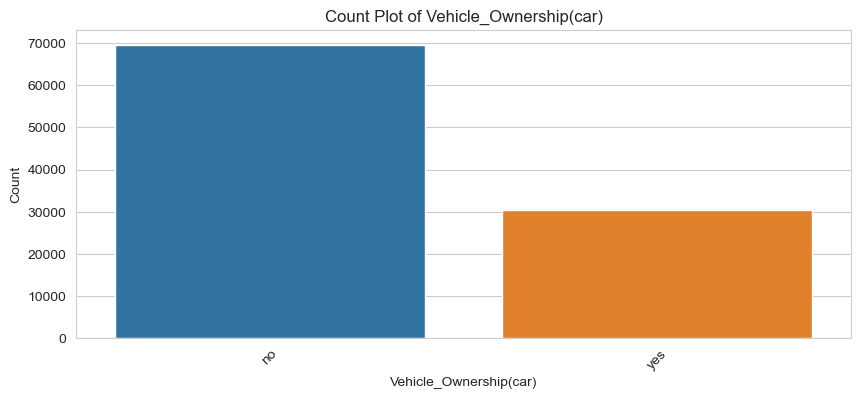

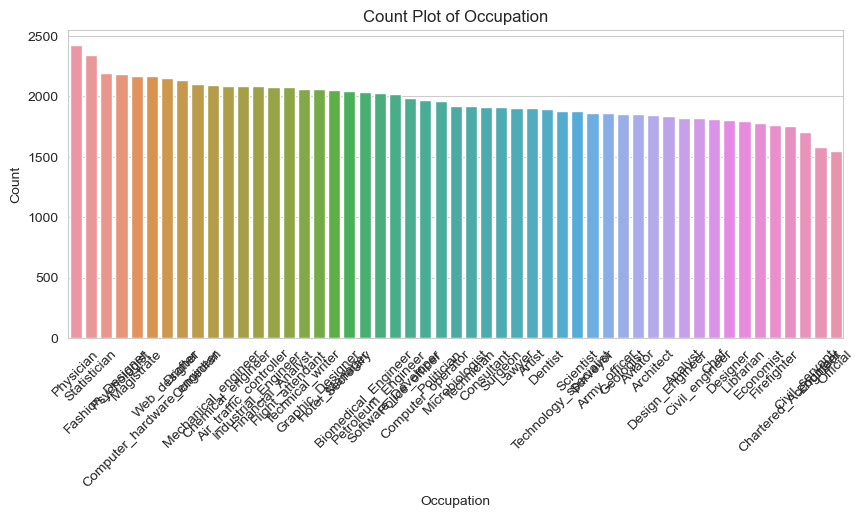

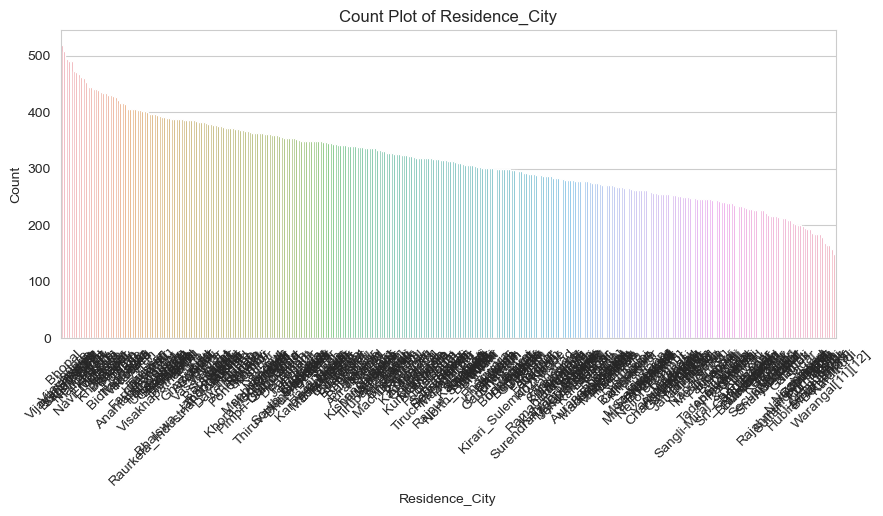

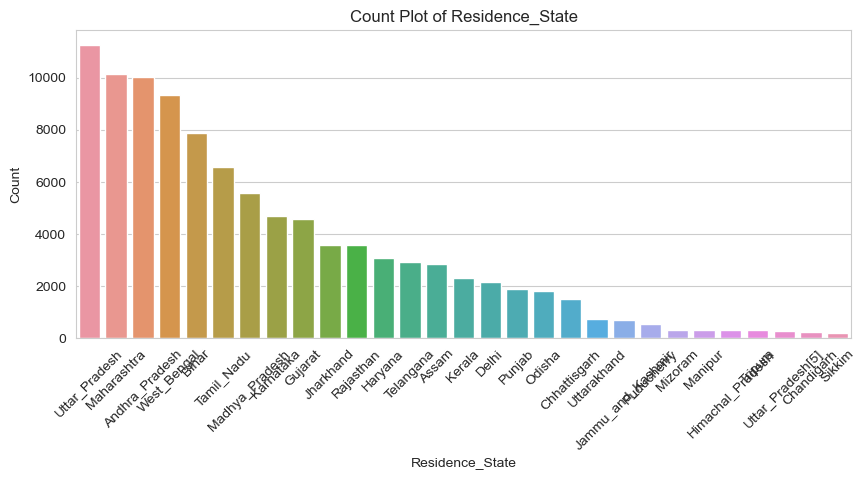

In [35]:
# List of categorical features
categorical_features = ['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)', 
                        'Occupation', 'Residence_City', 'Residence_State']

# Count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


3.4 Bivariate Analysis


Numerical Features vs. Target Variable



Distribution of Loan_Default_Risk:
0    87003
1    12997
Name: Loan_Default_Risk, dtype: int64


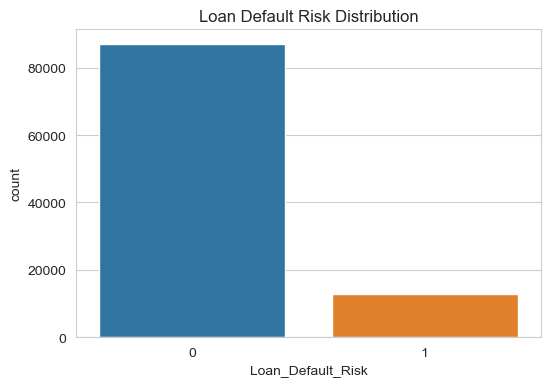

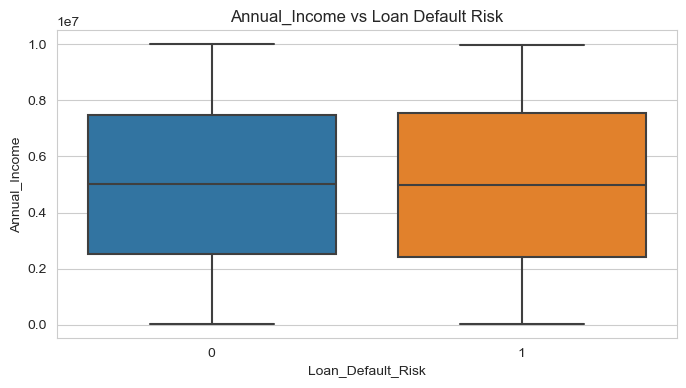

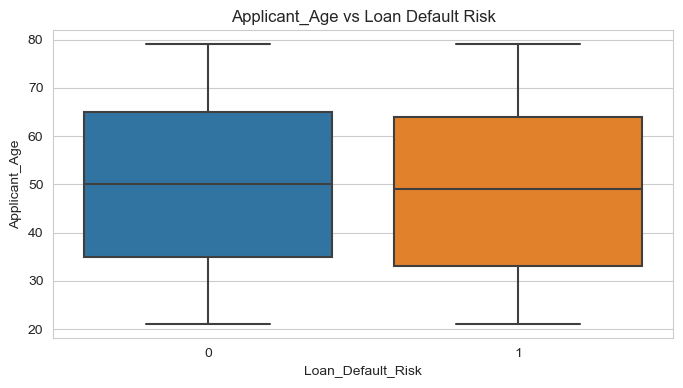

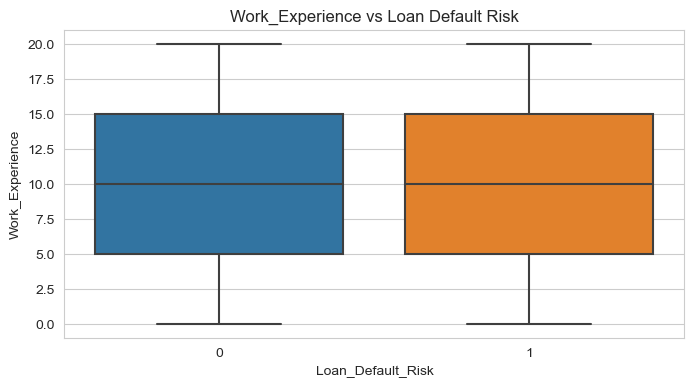

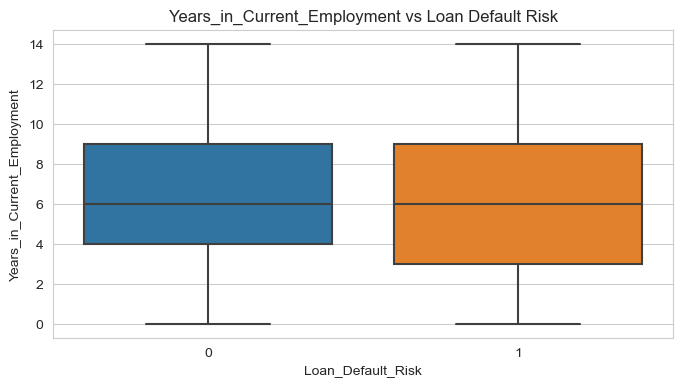

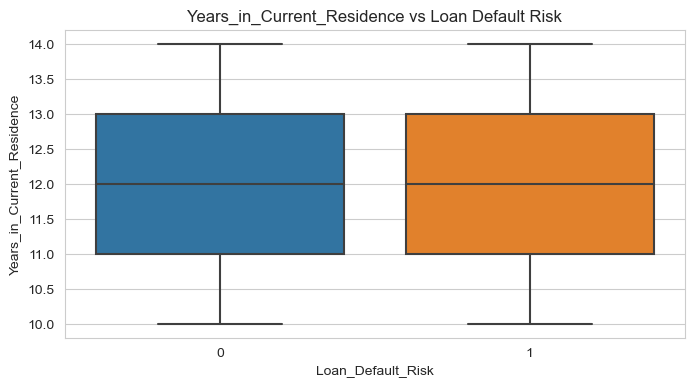

In [36]:
# Target variable distribution
print("\nDistribution of Loan_Default_Risk:")
print(df['Loan_Default_Risk'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Default_Risk', data=df)
plt.title('Loan Default Risk Distribution')
plt.show()

# Boxplots of numerical features against Loan_Default_Risk
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Loan_Default_Risk', y=feature, data=df)
    plt.title(f'{feature} vs Loan Default Risk')
    plt.show()


Categorical Features vs. Target Variable



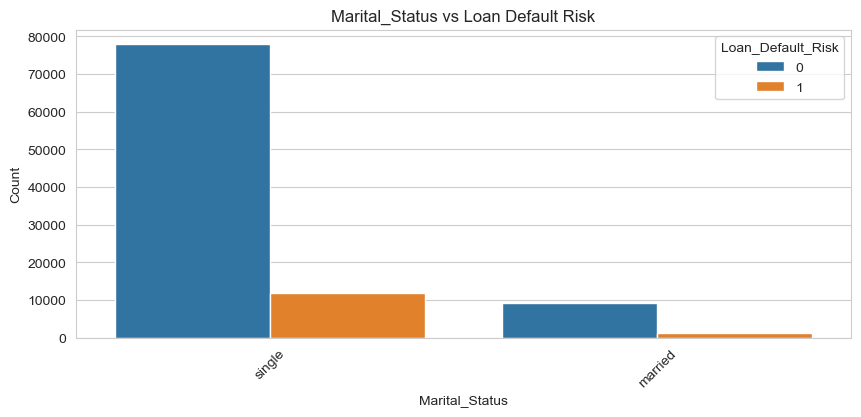

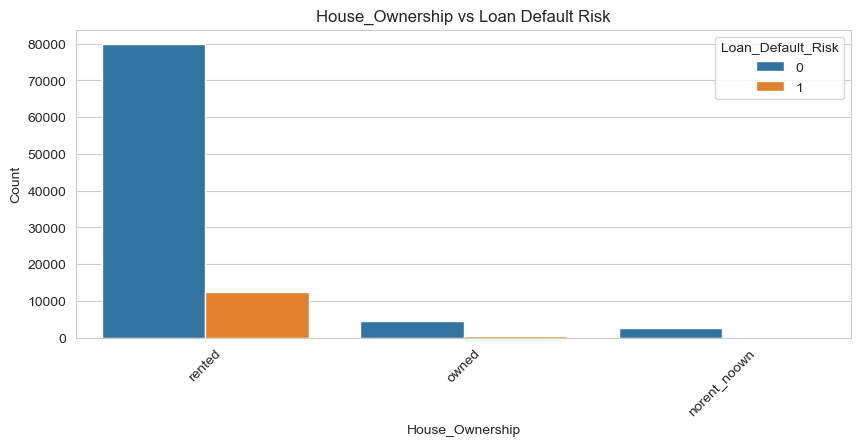

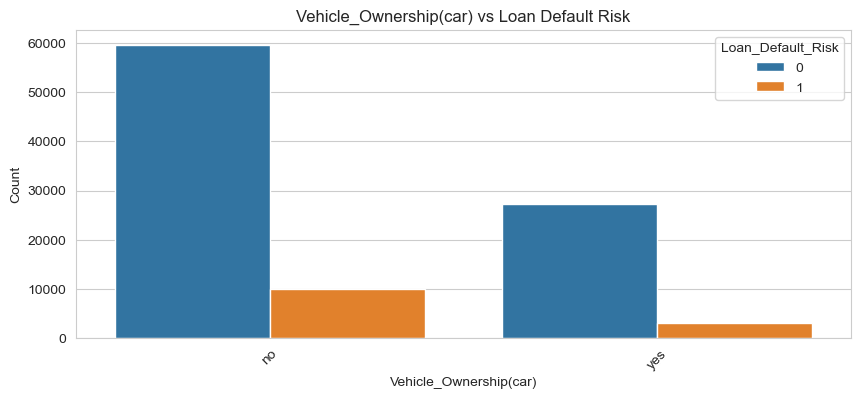

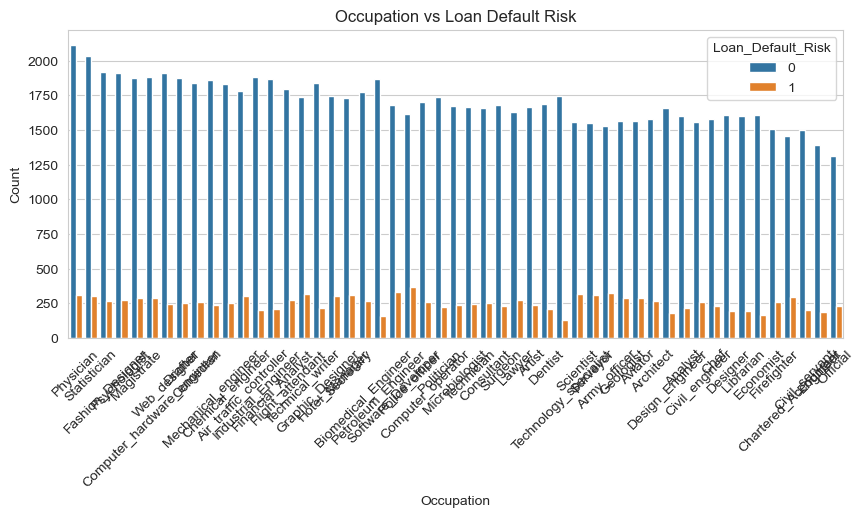

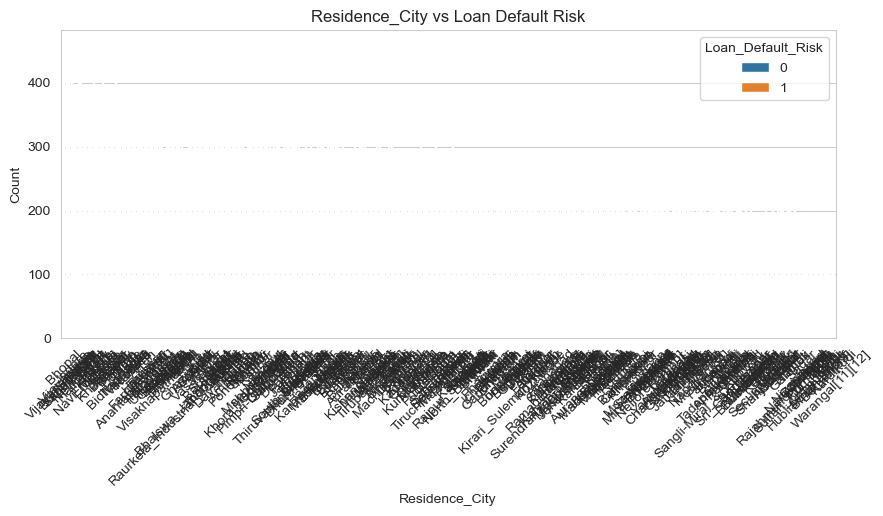

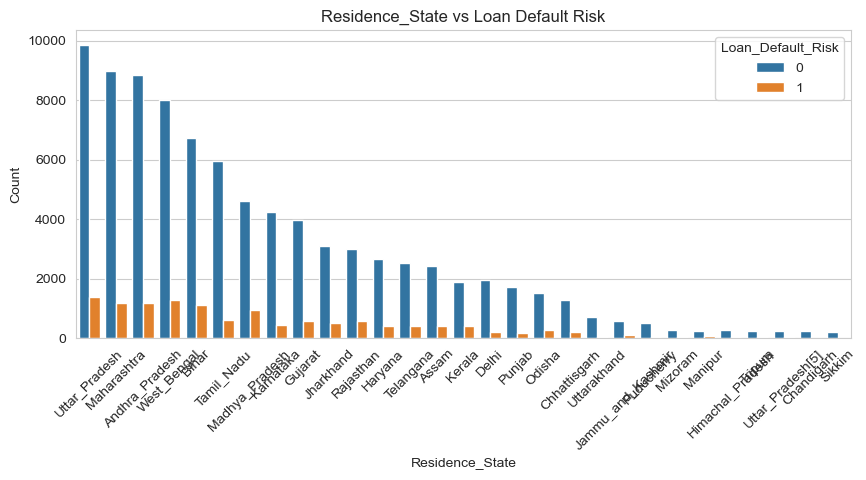

In [37]:
# Count plots of categorical features against Loan_Default_Risk
for feature in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature, hue='Loan_Default_Risk', data=df, order=df[feature].value_counts().index)
    plt.title(f'{feature} vs Loan Default Risk')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


3.5 Correlation Analysis


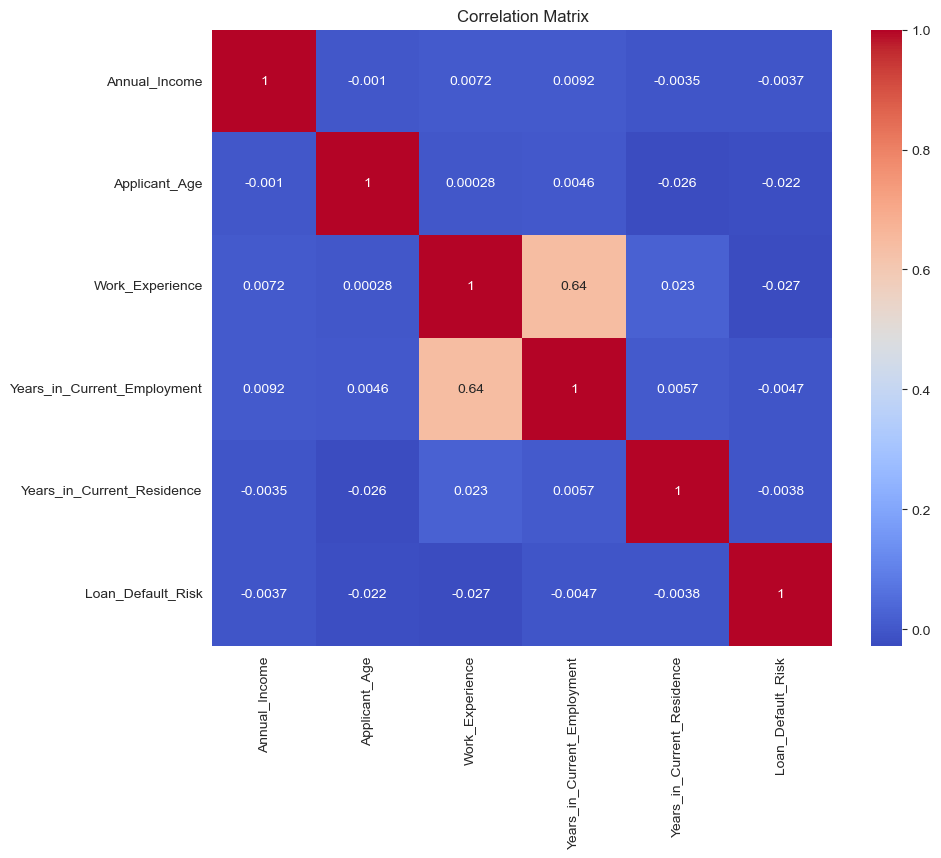

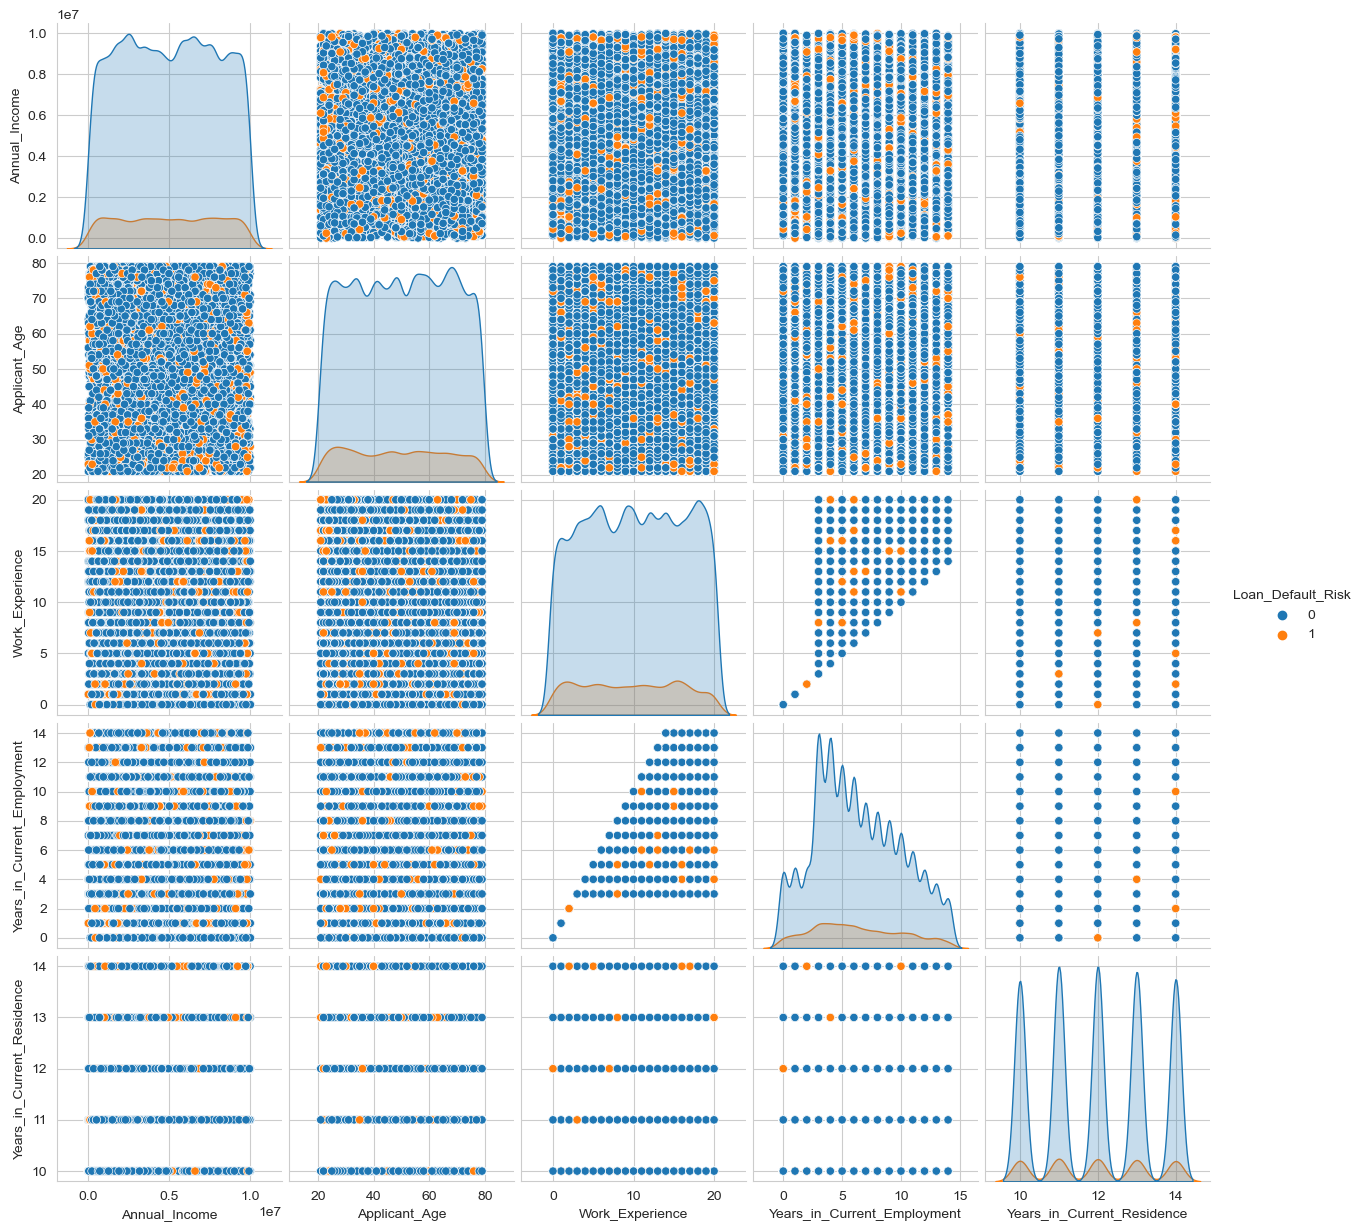

In [38]:
# Correlation Matrix
plt.figure(figsize=(10,8))
corr = df[numerical_features + ['Loan_Default_Risk']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot of numerical features colored by Loan_Default_Risk
sns.pairplot(df[numerical_features + ['Loan_Default_Risk']], hue='Loan_Default_Risk')
plt.show()


4. Data Cleaning


4.1 Handling Missing Values


In [39]:
# Fill missing numerical values with median
for col in numerical_features:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Filled missing values in {col} with median value {median_value}")

# Fill missing categorical values with mode
for col in categorical_features:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Filled missing values in {col} with mode value '{mode_value}'")

# Verify that there are no missing values now
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Filled missing values in Annual_Income with median value 5004938.0
Filled missing values in Applicant_Age with median value 50.0
Filled missing values in Work_Experience with median value 10.0
Filled missing values in Years_in_Current_Employment with median value 6.0
Filled missing values in Years_in_Current_Residence with median value 12.0
Filled missing values in Marital_Status with mode value 'single'
Filled missing values in House_Ownership with mode value 'rented'
Filled missing values in Vehicle_Ownership(car) with mode value 'no'
Filled missing values in Occupation with mode value 'Physician'
Filled missing values in Residence_City with mode value 'Vijayanagaram'
Filled missing values in Residence_State with mode value 'Uttar_Pradesh'

Missing Values After Imputation:
Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownershi

4.2 Data Type Conversion


In [40]:
# Ensure that data types are appropriate
print("\nData Types Before Conversion:")
print(df.dtypes)

# Convert 'Applicant_ID' to string if it's numerical
df['Applicant_ID'] = df['Applicant_ID'].astype(str)

# Convert 'Loan_Default_Risk' to integer if it's not
df['Loan_Default_Risk'] = df['Loan_Default_Risk'].astype(int)

# Verify data types after conversion
print("\nData Types After Conversion:")
print(df.dtypes)



Data Types Before Conversion:
Applicant_ID                    int64
Annual_Income                   int64
Applicant_Age                   int64
Work_Experience                 int64
Marital_Status                 object
House_Ownership                object
Vehicle_Ownership(car)         object
Occupation                     object
Residence_City                 object
Residence_State                object
Years_in_Current_Employment     int64
Years_in_Current_Residence      int64
Loan_Default_Risk               int64
dtype: object

Data Types After Conversion:
Applicant_ID                   object
Annual_Income                   int64
Applicant_Age                   int64
Work_Experience                 int64
Marital_Status                 object
House_Ownership                object
Vehicle_Ownership(car)         object
Occupation                     object
Residence_City                 object
Residence_State                object
Years_in_Current_Employment     int64
Years_in_Curr

5. Outlier Detection and Handling


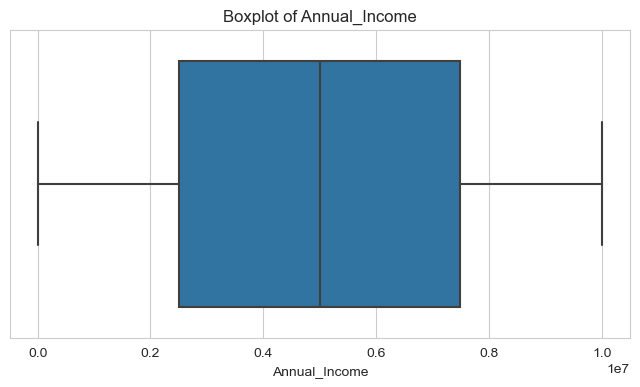

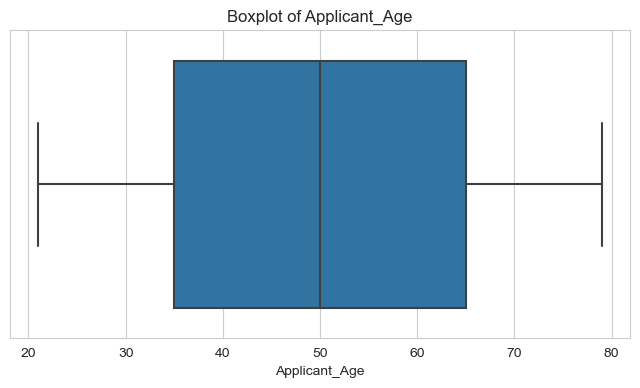

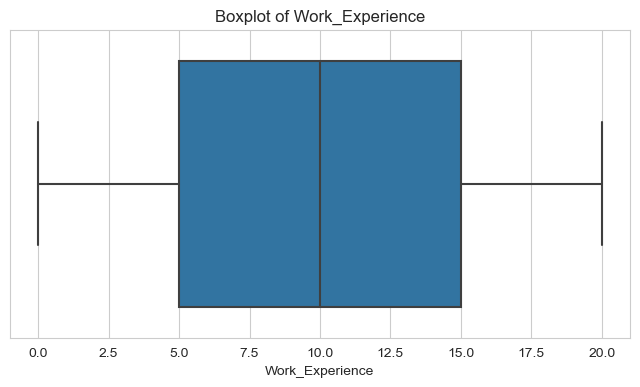

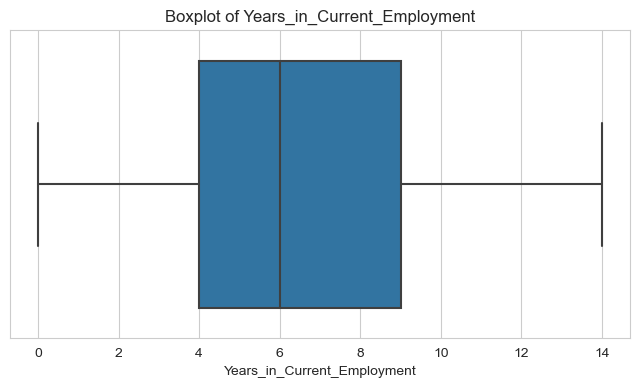

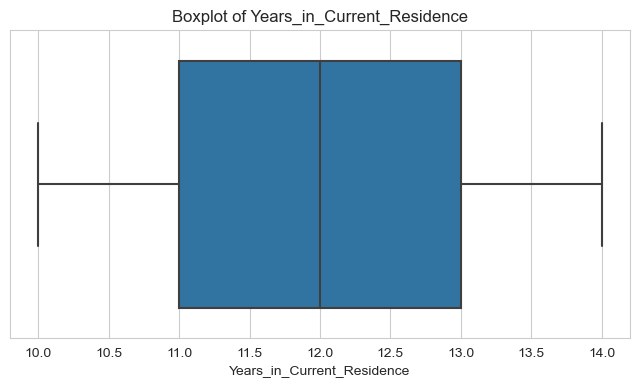

Capped outliers in Annual_Income at lower bound -4948523.0 and upper bound 14933117.0
Capped outliers in Applicant_Age at lower bound -10.0 and upper bound 110.0
Capped outliers in Work_Experience at lower bound -10.0 and upper bound 30.0
Capped outliers in Years_in_Current_Employment at lower bound -3.5 and upper bound 16.5
Capped outliers in Years_in_Current_Residence at lower bound 8.0 and upper bound 16.0


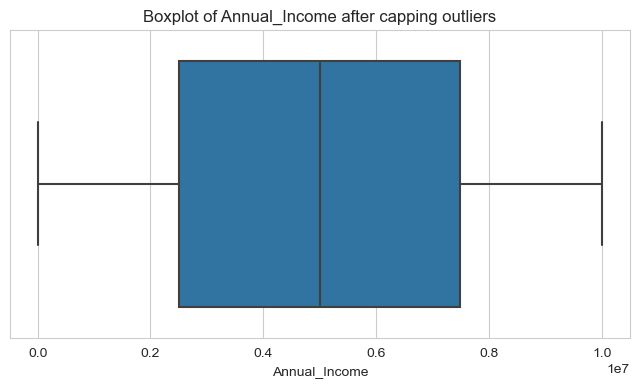

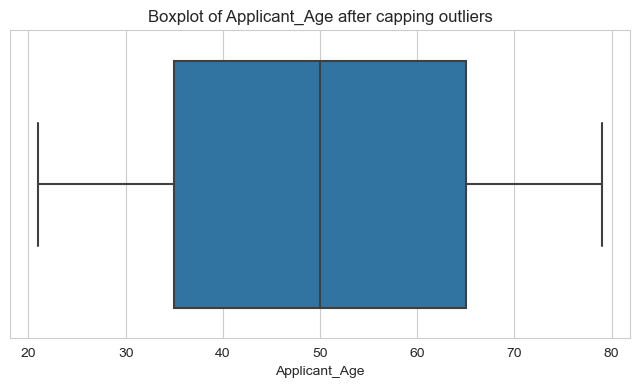

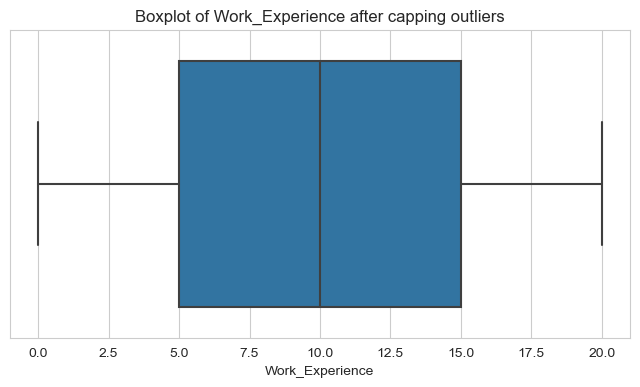

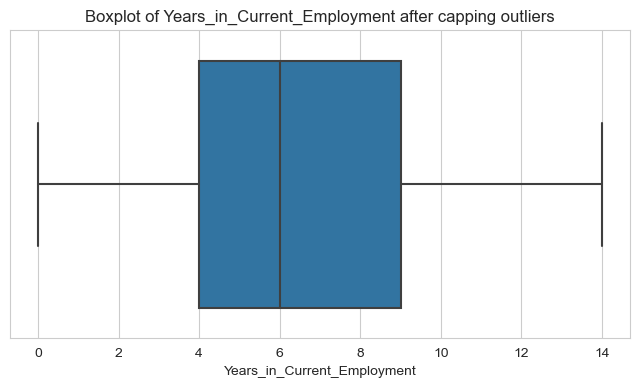

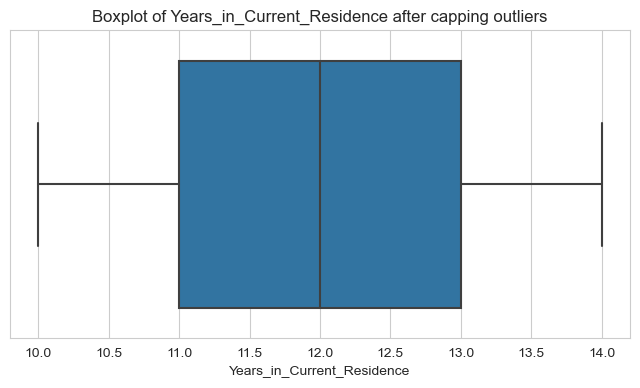

In [41]:
# Use boxplots to detect outliers in numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Function to cap outliers using Interquartile Range (IQR)
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))
    print(f"Capped outliers in {col} at lower bound {lower_bound} and upper bound {upper_bound}")

# Apply capping to numerical features
for col in numerical_features:
    cap_outliers(col)

# Verify that outliers are capped
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after capping outliers')
    plt.show()


6. Preprocessing


6.1 Encoding Categorical Variables


In [42]:
# Check unique values in categorical features
for col in categorical_features:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Label Encoding for binary categorical variables
binary_cols = ['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded {col} with Label Encoding")

# One-Hot Encoding for multi-class categorical variables
multi_class_cols = ['Occupation']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)
print("Applied One-Hot Encoding to 'Occupation'")

# For 'Residence_City' and 'Residence_State', encode only top 10 categories
for col in ['Residence_City', 'Residence_State']:
    top_categories = df[col].value_counts().nlargest(10).index
    df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')
    df = pd.get_dummies(df, columns=[col], drop_first=True)
    print(f"Encoded {col} with top categories and grouped others as 'Other'")



Unique values in Marital_Status:
['single' 'married']

Unique values in House_Ownership:
['rented' 'owned' 'norent_noown']

Unique values in Vehicle_Ownership(car):
['no' 'yes']

Unique values in Occupation:
['Psychologist' 'Petroleum_Engineer' 'Drafter' 'Chartered_Accountant'
 'Air_traffic_controller' 'Biomedical_Engineer' 'Fashion_Designer'
 'Magistrate' 'Technology_specialist' 'Lawyer' 'Civil_servant' 'Physician'
 'Financial_Analyst' 'Design_Engineer' 'Hotel_Manager' 'Engineer'
 'Computer_hardware_engineer' 'Flight_attendant' 'Comedian' 'Scientist'
 'Mechanical_engineer' 'Geologist' 'Aviator' 'Web_designer' 'Designer'
 'Architect' 'Statistician' 'Graphic_Designer' 'Dentist' 'Consultant'
 'Secretary' 'Economist' 'Official' 'Chemical_engineer' 'Politician'
 'Army_officer' 'Microbiologist' 'Librarian' 'Software_Developer'
 'Civil_engineer' 'Technical_writer' 'Chef' 'Artist' 'Firefighter'
 'Computer_operator' 'Surgeon' 'Industrial_Engineer' 'Police_officer'
 'Analyst' 'Technician' 'Sur

6.2 Scaling Numerical Features


In [43]:
# Add new engineered features to the numerical features list
numerical_features_extended = numerical_features.copy()

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features_extended] = scaler.fit_transform(df[numerical_features_extended])
print("Scaled numerical features using StandardScaler")


Scaled numerical features using StandardScaler


7. Feature Engineering


In [44]:
# Feature Engineering

# Ensure necessary libraries are imported
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize the scaler if not already done
scaler = StandardScaler()

# ----------------------------------------
# 1. Income_per_Age
# ----------------------------------------
df['Income_per_Age'] = df['Annual_Income'] / df['Applicant_Age']
df['Income_per_Age'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Income_per_Age'].fillna(0, inplace=True)
print("Created feature 'Income_per_Age'")

# ----------------------------------------
# 2. Work_Experience_Ratio
# ----------------------------------------
df['Work_Experience_Ratio'] = df['Work_Experience'] / df['Applicant_Age']
df['Work_Experience_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Work_Experience_Ratio'].fillna(0, inplace=True)
print("Created feature 'Work_Experience_Ratio'")

# ----------------------------------------
# 3. Income_Stability
# ----------------------------------------
df['Income_Stability'] = df['Years_in_Current_Employment'] / df['Work_Experience']
df['Income_Stability'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Income_Stability'].fillna(0, inplace=True)
print("Created feature 'Income_Stability'")

# ----------------------------------------
# 4. Asset_Ownership_Score
# ----------------------------------------
# If not already encoded, encode 'House_Ownership' and 'Vehicle_Ownership(car)' using LabelEncoder
# Assuming 'House_Ownership' and 'Vehicle_Ownership(car)' are already label encoded

# If they are not encoded, encode them now
binary_cols = ['House_Ownership', 'Vehicle_Ownership(car)']
le = LabelEncoder()
for col in binary_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        print(f"Encoded {col} with Label Encoding")

# Asset Ownership Score
df['Asset_Ownership_Score'] = df['House_Ownership'] + df['Vehicle_Ownership(car)']
print("Created feature 'Asset_Ownership_Score'")

# ----------------------------------------
# 5. Tenure_Ratio
# ----------------------------------------
df['Tenure_Ratio'] = df['Years_in_Current_Residence'] / df['Years_in_Current_Employment']
df['Tenure_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Tenure_Ratio'].fillna(0, inplace=True)
print("Created feature 'Tenure_Ratio'")

# ----------------------------------------
# 6. Employment_Gap
# ----------------------------------------
df['Employment_Gap'] = df['Applicant_Age'] - df['Work_Experience']
df['Employment_Gap'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Employment_Gap'].fillna(0, inplace=True)
print("Created feature 'Employment_Gap'")

# ----------------------------------------
# Existing Features (from previous steps)
# 7. Employment_Stability
# 8. Residence_Stability
# ----------------------------------------
# Assuming 'Employment_Stability' and 'Residence_Stability' have already been created

# If not, create them now
# Employment Stability Ratio
df['Employment_Stability'] = df['Years_in_Current_Employment'] / df['Applicant_Age']
df['Employment_Stability'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Employment_Stability'].fillna(0, inplace=True)
print("Created feature 'Employment_Stability'")

# Residence Stability Ratio
df['Residence_Stability'] = df['Years_in_Current_Residence'] / df['Applicant_Age']
df['Residence_Stability'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Residence_Stability'].fillna(0, inplace=True)
print("Created feature 'Residence_Stability'")

# ----------------------------------------
# Scaling the New Numerical Features
# ----------------------------------------

# List of new numerical features
new_numerical_features = ['Income_per_Age', 'Work_Experience_Ratio', 'Income_Stability',
                          'Asset_Ownership_Score', 'Tenure_Ratio', 'Employment_Gap',
                          'Employment_Stability', 'Residence_Stability']

# Update the list of numerical features
numerical_features_extended = numerical_features.copy()
numerical_features_extended.extend(new_numerical_features)

# Remove duplicates if any
numerical_features_extended = list(set(numerical_features_extended))

# Scaling the new features
df[new_numerical_features] = scaler.fit_transform(df[new_numerical_features])
print("Scaled new numerical features using StandardScaler")

# ----------------------------------------
# Handling Missing Values After Feature Engineering
# ----------------------------------------

# Check for any remaining missing values
print("\nMissing Values After Feature Engineering:")
print(df[new_numerical_features].isnull().sum())

# ----------------------------------------
# Final Dataset Preparation
# ----------------------------------------

# Display data types after processing
print("\nData Types After Feature Engineering:")
print(df[new_numerical_features].dtypes)

# Display the first few rows of the new features
print("\nFirst five rows of the new features:")
df[new_numerical_features].head()



Created feature 'Income_per_Age'
Created feature 'Work_Experience_Ratio'
Created feature 'Income_Stability'
Created feature 'Asset_Ownership_Score'
Created feature 'Tenure_Ratio'
Created feature 'Employment_Gap'
Created feature 'Employment_Stability'
Created feature 'Residence_Stability'
Scaled new numerical features using StandardScaler

Missing Values After Feature Engineering:
Income_per_Age           0
Work_Experience_Ratio    0
Income_Stability         0
Asset_Ownership_Score    0
Tenure_Ratio             0
Employment_Gap           0
Employment_Stability     0
Residence_Stability      0
dtype: int64

Data Types After Feature Engineering:
Income_per_Age           float64
Work_Experience_Ratio    float64
Income_Stability         float64
Asset_Ownership_Score    float64
Tenure_Ratio             float64
Employment_Gap           float64
Employment_Stability     float64
Residence_Stability      float64
dtype: object

First five rows of the new features:


,Income_per_Age,Work_Experience_Ratio,Income_Stability,Asset_Ownership_Score,Tenure_Ratio,Employment_Gap,Employment_Stability,Residence_Stability
0,0.012247,-0.005842,0.149444,-0.324942,0.017326,2.270777,0.004280,-0.006193
1,0.006354,-0.007091,0.164301,-0.324942,-0.100067,-1.469348,0.002423,-0.004375
2,0.007627,-0.004372,0.229387,-0.324942,0.016610,0.912567,0.005226,-0.006190
3,0.008725,0.003837,0.142670,-1.983484,-0.107988,0.784526,0.014055,-0.009607
4,0.005855,-0.002556,-0.350643,-0.324942,0.270585,-0.117583,0.002347,-0.010176


8. Final Dataset Preparation


In [45]:
# Drop irrelevant features if necessary
df.drop(['Applicant_ID'], axis=1, inplace=True, errors='ignore')
print("Dropped 'Applicant_ID' column")

# Display data types after processing
print("\nData Types After Processing:")
print(df.dtypes)

# Display the first few rows of the processed dataset
print("\nFirst five rows after processing:")
df.head()

# Save the processed data to a new CSV file
df.to_csv('loan_data_processed.csv', index=False)
print("Saved the processed dataset to 'loan_data_processed.csv'")


Dropped 'Applicant_ID' column

Data Types After Processing:
Annual_Income            float64
Applicant_Age            float64
Work_Experience          float64
Marital_Status             int32
House_Ownership            int32
                          ...   
Asset_Ownership_Score    float64
Tenure_Ratio             float64
Employment_Gap           float64
Employment_Stability     float64
Residence_Stability      float64
Length: 87, dtype: object

First five rows after processing:
Saved the processed dataset to 'loan_data_processed.csv'


9. Model Building
In this section, we'll build predictive models using various algorithms, evaluate their performance, analyze feature importance, and perform hyperparameter tuning.

9.1 Data Splitting


In [46]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define feature matrix X and target vector y
X = df.drop('Loan_Default_Risk', axis=1)
y = df['Loan_Default_Risk']

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:")
print("Training target distribution:")
print(y_train.value_counts())

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print("Resampled training target distribution:")
print(y_train_resampled.value_counts())


Before SMOTE:
Training target distribution:
0    69602
1    10398
Name: Loan_Default_Risk, dtype: int64

After SMOTE:
Resampled training target distribution:
0    69602
1    69602
Name: Loan_Default_Risk, dtype: int64


Explanation:

Stratify Parameter: We use stratify=y to ensure that the class distribution of the target variable is preserved in both the training and testing sets.
Random State: Setting random_state=42 ensures reproducibility.

9.2 Model Training 
We'll train the following models:

Logistic Regression
Decision Tree
Random Forest
Gradient Boosting
K-Nearest Neighbors (KNN)

In [47]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models with default parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")



Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.
Gradient Boosting model trained.
KNN model trained.


Explanation:

max_iter in Logistic Regression: Increased to 1000 to ensure convergence.
probability=True in SVC: Enables probability estimates needed for ROC-AUC calculation.

9.3 Model Evaluation
We'll evaluate the models using the following metrics:

Accuracy
Precision
Recall
F1-Score
ROC-AUC Score


Logistic Regression Evaluation Metrics:
Accuracy: 0.8700
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5919


C:\Users\Annuj\AppData\Local\Temp\ipykernel_27012\726151292.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({


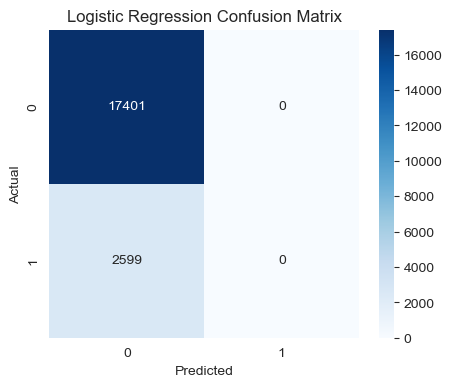

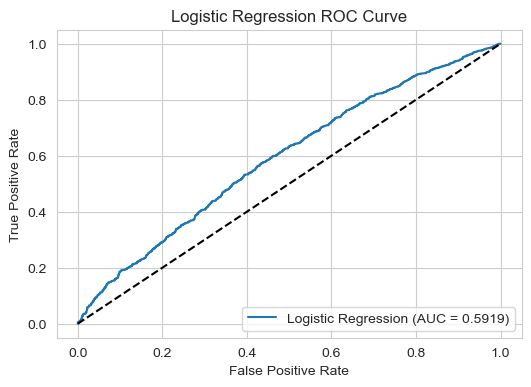


Decision Tree Evaluation Metrics:
Accuracy: 0.9290
Precision: 0.6987
Recall: 0.7968
F1-Score: 0.7446
ROC-AUC: 0.9704


C:\Users\Annuj\AppData\Local\Temp\ipykernel_27012\726151292.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({


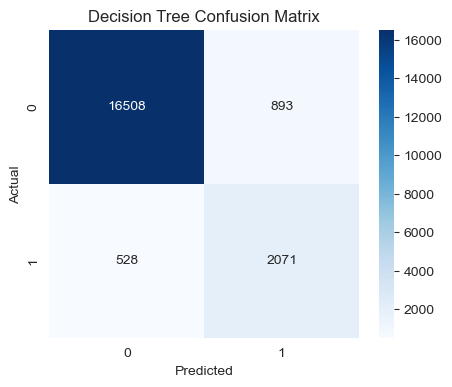

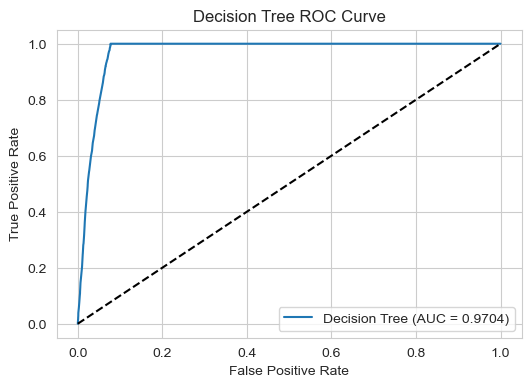


Random Forest Evaluation Metrics:
Accuracy: 0.9294
Precision: 0.6899
Recall: 0.8288
F1-Score: 0.7530
ROC-AUC: 0.9703


C:\Users\Annuj\AppData\Local\Temp\ipykernel_27012\726151292.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({


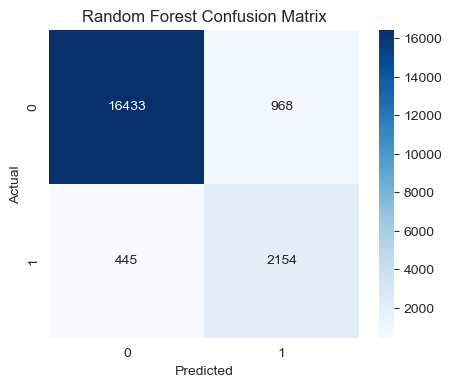

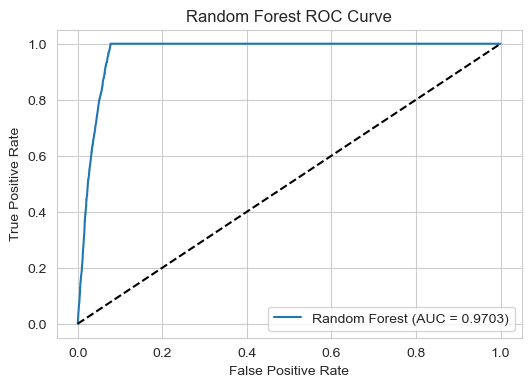


Gradient Boosting Evaluation Metrics:
Accuracy: 0.8704
Precision: 0.6818
Recall: 0.0058
F1-Score: 0.0114
ROC-AUC: 0.7213


C:\Users\Annuj\AppData\Local\Temp\ipykernel_27012\726151292.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({


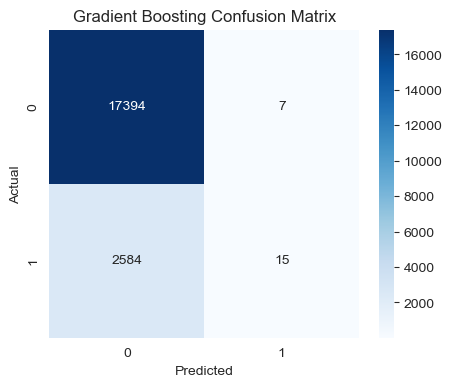

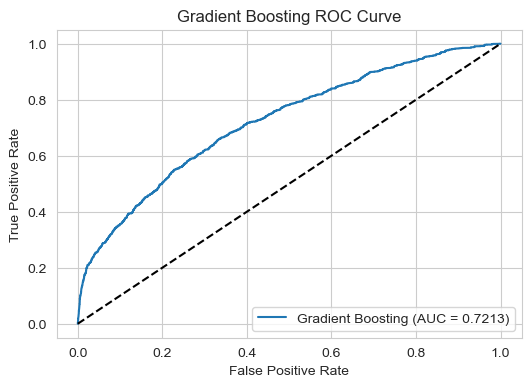


KNN Evaluation Metrics:
Accuracy: 0.9237
Precision: 0.6879
Recall: 0.7557
F1-Score: 0.7202
ROC-AUC: 0.9625


C:\Users\Annuj\AppData\Local\Temp\ipykernel_27012\726151292.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({


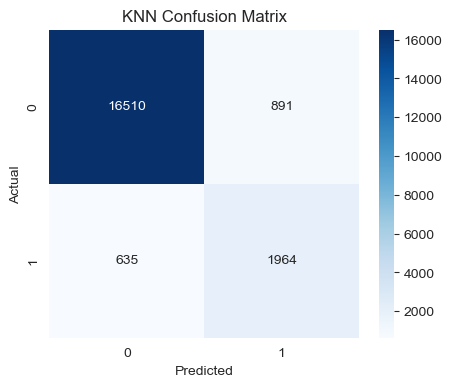

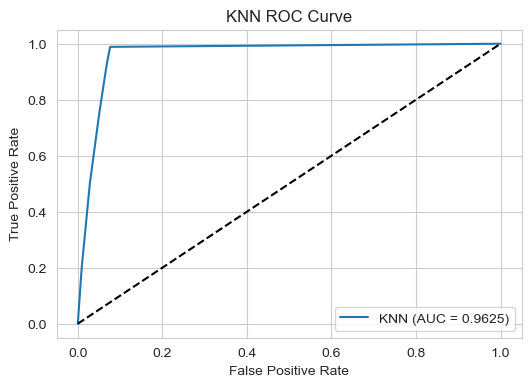

In [48]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Create a DataFrame to store the evaluation metrics
evaluation_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # For ROC-AUC, we need predicted probabilities
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        # For models without predict_proba, use decision_function
        y_pred_proba = model.decision_function(X_test)
        # Normalize to [0,1]
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
    else:
        # If neither is available, skip ROC-AUC
        y_pred_proba = None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Append metrics to the DataFrame
    evaluation_results = evaluation_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }, ignore_index=True)
    
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    else:
        print("ROC-AUC: Not available")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


Explanation:

Zero Division Handling: zero_division=0 in precision and recall functions to handle cases where there might be zero divisions.
Normalization for Decision Function: For SVM models without predict_proba, we normalize the decision_function output to a [0,1] range.
Visualization: Confusion matrices and ROC curves for each model.


In [49]:
# Display the evaluation metrics
evaluation_results.sort_values(by='ROC-AUC', ascending=False, inplace=True)
evaluation_results.reset_index(drop=True, inplace=True)
evaluation_results


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Decision Tree,0.92895,0.698718,0.796845,0.744562,0.970374
1,Random Forest,0.92935,0.689942,0.828780,0.753015,0.970297
2,KNN,0.92370,0.687916,0.755675,0.720205,0.962488
3,Gradient Boosting,0.87045,0.681818,0.005771,0.011446,0.721251
4,Logistic Regression,0.87005,0.000000,0.000000,0.000000,0.591863


9.4 Feature Importance
We'll analyze feature importance for tree-based models (Decision Tree and Random Forest).



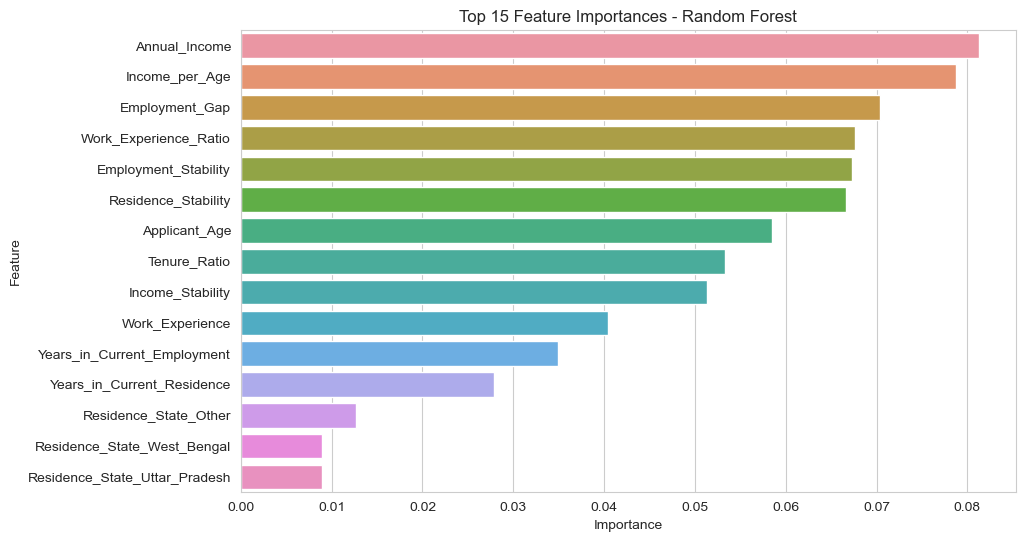

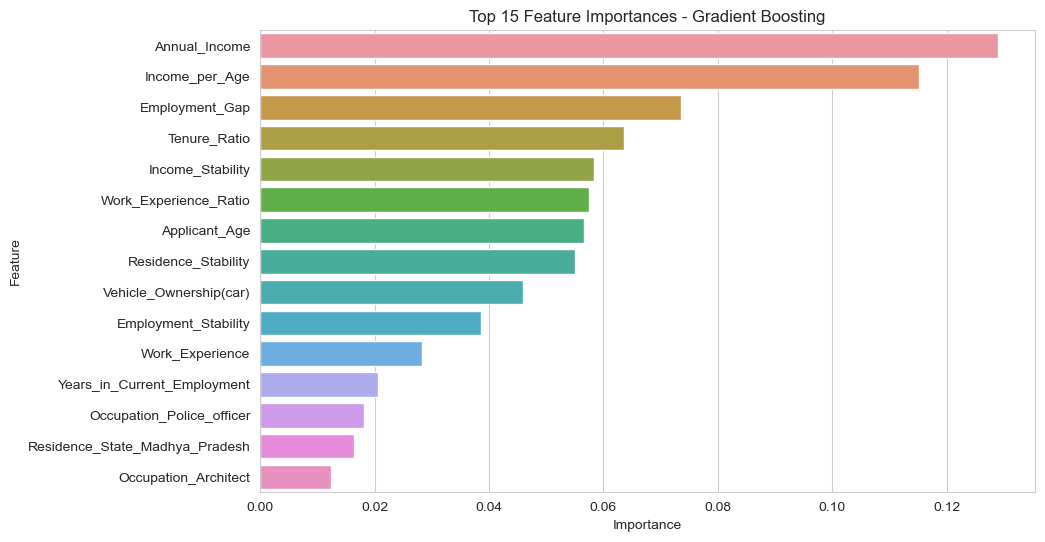

In [50]:
# Feature Importance for Random Forest
importances_rf = models['Random Forest'].feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
})

# Sort the DataFrame by importance
feature_importance_rf.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances for Random Forest
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(15))
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Feature Importance for Gradient Boosting
importances_gb = models['Gradient Boosting'].feature_importances_

# Create a DataFrame for visualization
feature_importance_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_gb
})

# Sort the DataFrame by importance
feature_importance_gb.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances for Gradient Boosting
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb.head(15))
plt.title('Top 15 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


9.5 Hyperparameter Tuning
We'll perform hyperparameter tuning on the Random Forest model using GridSearchCV.

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Annuj\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found for Random Forest:
{'max_depth': None, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 200}

Optimized Random Forest Evaluation Metrics:
Accuracy: 0.9297
Precision: 0.6909
Recall: 0.8307
F1-Score: 0.7544
ROC-AUC: 0.9704


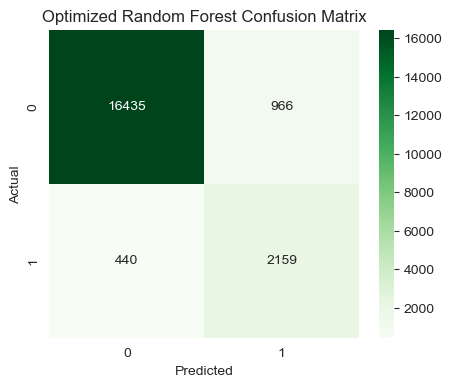

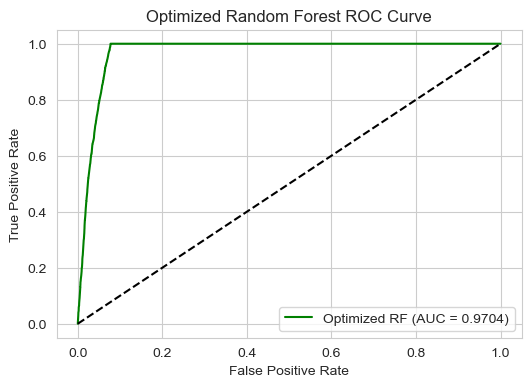

In [51]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=2
)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Best estimator
best_rf = grid_search_rf.best_estimator_

# Evaluate the best model
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nOptimized Random Forest Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Optimized Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Optimized RF (AUC = {roc_auc:.4f})', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


Hyperparameter Tuning for Gradient Boosting



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}

Optimized Gradient Boosting Evaluation Metrics:
Accuracy: 0.8854
Precision: 0.7869
Recall: 0.1620
F1-Score: 0.2687
ROC-AUC: 0.9312


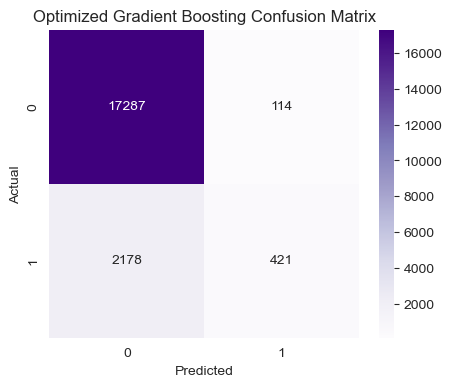

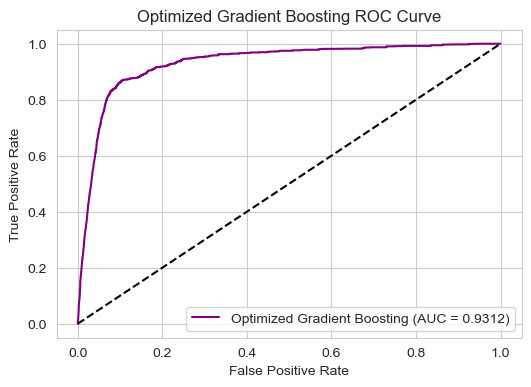

In [52]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1.0]
}

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid_gb,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=2
)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Best parameters
print("Best parameters found for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Best estimator
best_gb = grid_search_gb.best_estimator_

# Evaluate the best model
y_pred = best_gb.predict(X_test)
y_pred_proba = best_gb.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nOptimized Gradient Boosting Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Optimized Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Optimized Gradient Boosting (AUC = {roc_auc:.4f})', color='purple')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [53]:
# Append the optimized Random Forest model's metrics to the evaluation results
evaluation_results = evaluation_results.append({
    'Model': 'Optimized Random Forest',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}, ignore_index=True)

# Evaluate the optimized Gradient Boosting model
y_pred = best_gb.predict(X_test)
y_pred_proba = best_gb.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Append the optimized Gradient Boosting model's metrics to the evaluation results
evaluation_results = evaluation_results.append({
    'Model': 'Optimized Gradient Boosting',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}, ignore_index=True)

# Display updated evaluation metrics
evaluation_results.sort_values(by='ROC-AUC', ascending=False, inplace=True)
evaluation_results.reset_index(drop=True, inplace=True)
evaluation_results


C:\Users\Annuj\AppData\Local\Temp\ipykernel_27012\3513064431.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({
C:\Users\Annuj\AppData\Local\Temp\ipykernel_27012\3513064431.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Decision Tree,0.92895,0.698718,0.796845,0.744562,0.970374
1,Random Forest,0.92935,0.689942,0.828780,0.753015,0.970297
2,KNN,0.92370,0.687916,0.755675,0.720205,0.962488
3,Optimized Random Forest,0.88540,0.786916,0.161985,0.268666,0.931215
4,Optimized Gradient Boosting,0.88540,0.786916,0.161985,0.268666,0.931215
5,Gradient Boosting,0.87045,0.681818,0.005771,0.011446,0.721251
6,Logistic Regression,0.87005,0.000000,0.000000,0.000000,0.591863


In [54]:
# Save the best model to disk
import joblib

# Assuming 'models' is a dictionary containing our trained models
best_model = models['Random Forest']

# Save the model
joblib.dump(best_model, 'best_random_forest_model.pkl')
print("Best Random Forest model saved as 'best_random_forest_model.pkl'")

# If you used a scaler during preprocessing, save it as well
from sklearn.preprocessing import StandardScaler

# Assuming 'scaler' was used for scaling numerical features
# If not already saved, save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")


Best Random Forest model saved as 'best_random_forest_model.pkl'
Scaler saved as 'scaler.pkl'


In [55]:
# Get the list of expected columns from X_train
expected_columns = X_train.columns.tolist()

# Save the list using joblib
import joblib
joblib.dump(expected_columns, 'expected_columns.pkl')

print("Expected columns saved to 'expected_columns.pkl'")


Expected columns saved to 'expected_columns.pkl'


In [56]:
print("Features in scaler:", scaler.feature_names_in_)


Features in scaler: ['Income_per_Age' 'Work_Experience_Ratio' 'Income_Stability'
 'Asset_Ownership_Score' 'Tenure_Ratio' 'Employment_Gap'
 'Employment_Stability' 'Residence_Stability']
